In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('train.csv') # train 데이터셋 불러오기
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


## 수치형만 상관계수 그리기

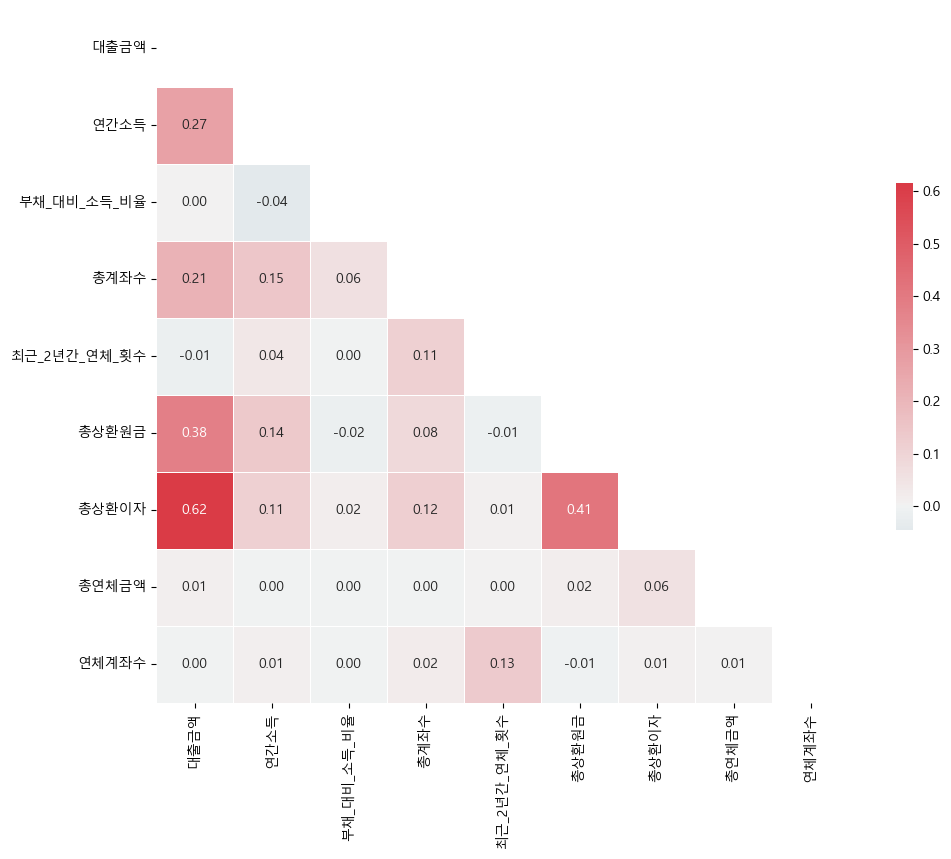

In [5]:
df = df.drop('ID', axis=1)

# 원하는 변수만 선택
df = df[['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']]

# 상관계수 계산
corr = df.corr()

# 상삼각행렬 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 그래프 설정
f, ax = plt.subplots(figsize=(12, 9))

# 컬러 맵 설정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 히트맵 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')

# 상하 좌우 라벨 설정
plt.yticks(rotation=0) 
plt.xticks(rotation=90)

# 그래프 표시
plt.show()


## 범주형 라벨 인코딩만 한 후 상관계수 그래프 그리기 

In [8]:
df = pd.read_csv('train.csv') # train 데이터셋 불러오기
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# 대출기간 (le)
df['대출기간'] = le.fit_transform(df[['대출기간']])

# 대출목적 (le)
df['대출목적'] = le.fit_transform(df[['대출목적']])

# 주택소유상태 (le)
df['주택소유상태'] = le.fit_transform(df[['주택소유상태']])

# 근로기간 (le)
df['근로기간'] = le.fit_transform(df[['근로기간']])

# 대출등급 (le)
df['대출등급'] = le.fit_transform(df[['대출등급']])

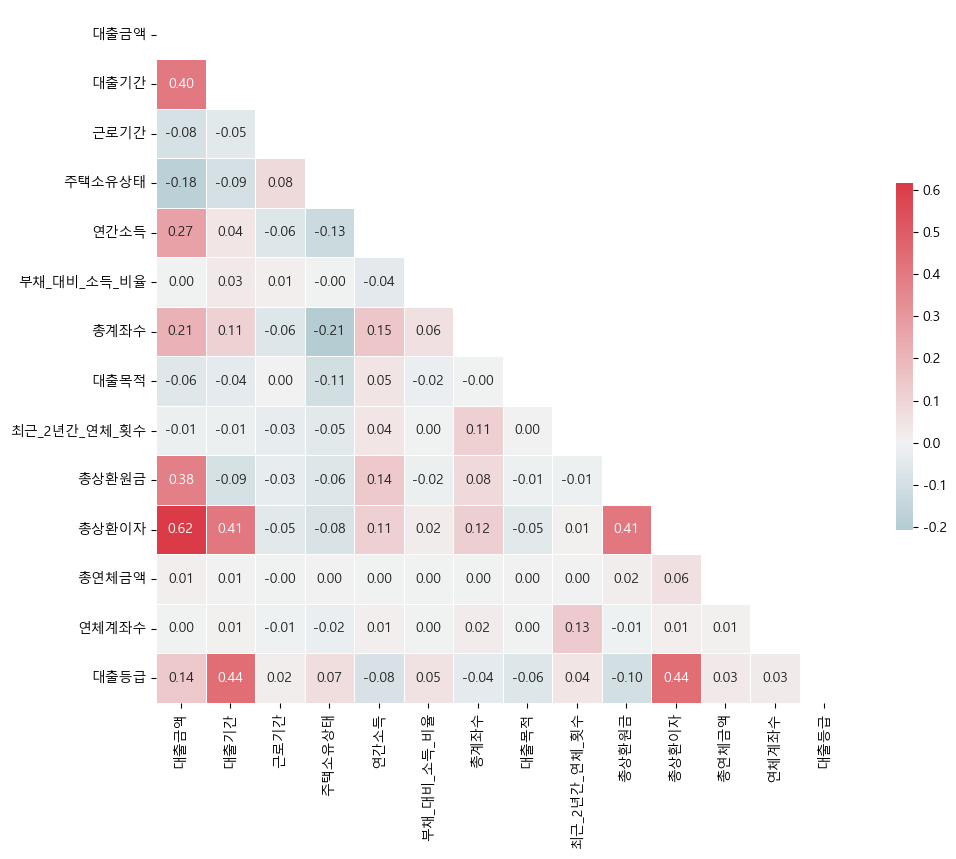

In [12]:
df = df.drop('ID', axis=1)

# 상관계수 계산
corr = df.corr()

# 상삼각행렬 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 그래프 설정
f, ax = plt.subplots(figsize=(12, 9))

# 컬러 맵 설정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 히트맵 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')  # annot 및 fmt 설정 추가

# 상하 좌우 라벨 설정
plt.yticks(rotation=0) 
plt.xticks(rotation=90)

# 그래프 표시
plt.show()

## 전처리(기본 변수 전처리+라벨인코딩) 까지 한 후 상관계수 확인

In [13]:
df = pd.read_csv('train.csv') # train 데이터셋 불러오기
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [14]:
df['근로기간'] = df['근로기간'].apply(lambda x: x + ' years' if x.isdigit() else x)
df['근로기간'] = df['근로기간'].replace('1 year', '1 years')
df['근로기간'] = df['근로기간'].str.replace(' ', '')
df['근로기간'] = df['근로기간'].str.replace('years|year', '', regex=True) #'years' 또는 'year' 제거

pd.pivot_table(df, index = '근로기간', aggfunc='size')

근로기간
1           6305
10+        32481
2           8450
3           7670
4           5588
5           5665
6           3874
7           3814
8           4888
9           3744
<1          8144
Unknown     5671
dtype: int64

In [15]:
df = df[df['주택소유상태'] != 'ANY']

In [16]:
df['대출기간'] = df['대출기간'].str.replace(' months', '')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# 대출목적 (le)
df['대출목적'] = le.fit_transform(df[['대출목적']])

# 주택소유상태 (le)
df['주택소유상태'] = le.fit_transform(df[['주택소유상태']])

# 근로기간 (le)
df['근로기간'] = le.fit_transform(df[['근로기간']])

# 대출등급 (le)
df['대출등급'] = le.fit_transform(df[['대출등급']])

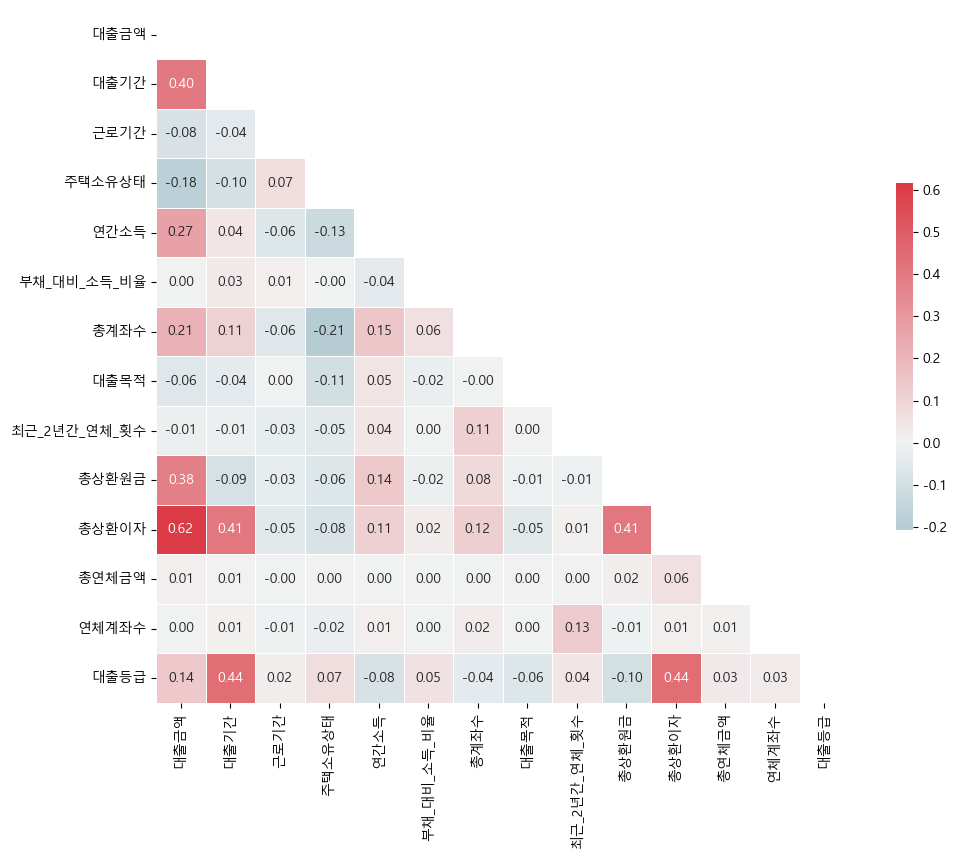

In [19]:
df = df.drop('ID', axis=1)

# 상관계수 계산
corr = df.corr()

# 상삼각행렬 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 그래프 설정
f, ax = plt.subplots(figsize=(12, 9))

# 컬러 맵 설정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 히트맵 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')  # annot 및 fmt 설정 추가

# 상하 좌우 라벨 설정
plt.yticks(rotation=0) 
plt.xticks(rotation=90)

# 그래프 표시
plt.show()

## 미정님이 주신 csv 파일로 상관계수 그래프 그리기

In [4]:
# 96293 rows × 18 columns
df = pd.read_csv('preprocessed_train.csv') # train 데이터셋 불러오기
df.head(3)

,Unnamed: 0,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,0,TRAIN_00000,0.658671,0.0,7,2,0.783116,0.324713,0.329845,1,0.0,0.000000,0.000000,0.0,0.0,2,0.000000,0.000000,0.658669
1,1,TRAIN_00001,0.698921,1.0,1,0,0.808957,0.341979,0.420151,10,0.0,0.731015,0.795184,0.0,0.0,1,0.758338,0.057717,0.555240
2,2,TRAIN_00002,0.647640,0.0,6,0,0.795568,0.245568,0.311543,1,0.0,0.782895,0.767395,0.0,0.0,0,0.791120,0.120407,0.647638


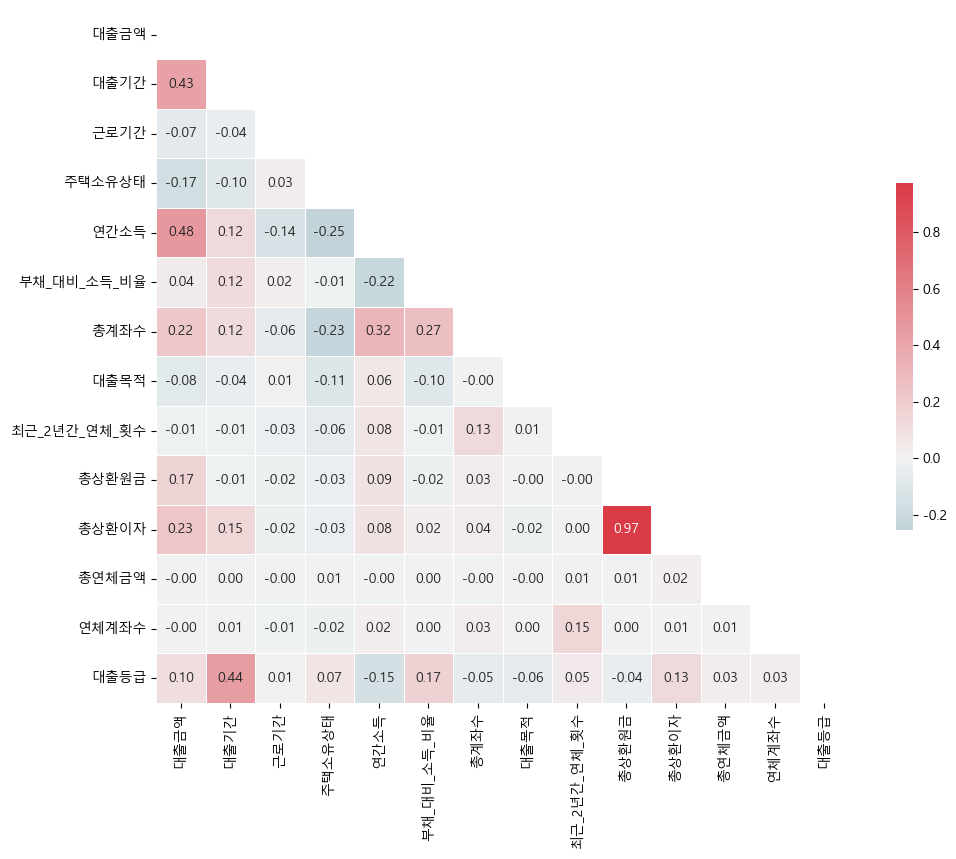

In [5]:
# 원하는 변수만 선택
df = df[['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '대출등급']]

# 상관계수 계산
corr = df.corr()

# 상삼각행렬 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 그래프 설정
f, ax = plt.subplots(figsize=(12, 9))

# 컬러 맵 설정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 히트맵 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')

# 상하 좌우 라벨 설정
plt.yticks(rotation=0) 
plt.xticks(rotation=90)

# 그래프 표시
plt.show()